## Assignment 1: Confusion Matrix Metrics

1. Generate a confusion matrix as well as accuracy, precision, recall and f1 scores for the model below

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

income = pd.read_csv("../Data/income.csv")

In [31]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = income_model_prep(income)

In [32]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)

lr = logreg.fit(X_train, y_train)

c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


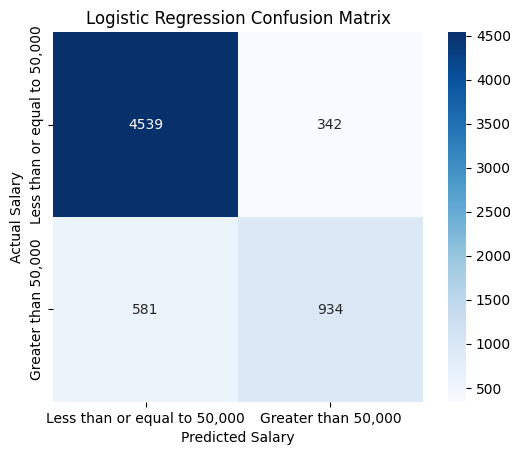

In [33]:
from sklearn.metrics import confusion_matrix

lr_confusion = confusion_matrix(y_test, lr.predict(X_test))
                                 
sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Less than or equal to 50,000", "Greater than 50,000"],        
    yticklabels=["Less than or equal to 50,000", "Greater than 50,000"]
).set(
    xlabel='Predicted Salary',
    ylabel='Actual Salary',
    title='Logistic Regression Confusion Matrix'
);

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(y_test, lr.predict(X_test))}")
print(f"Precision: {precision_score(y_test, lr.predict(X_test))}")
print(f"Recall: {recall_score(y_test, lr.predict(X_test))}")
print(f"F1: {f1_score(y_test, lr.predict(X_test))}")

Accuracy: 0.8556910569105691
Precision: 0.731974921630094
Recall: 0.6165016501650165
F1: 0.669294159799355


## Assignment 2: Precision Recall Curve and AUC

1. Plot the precison and recall curves for your model. Plot F1 vs. the Threshold - where is F1 maximized?
2. Report accuracy, precision, recall, and F1 at the threshold determined above.
3. Plot an ROC curve for your model and calculate the AUC score. 

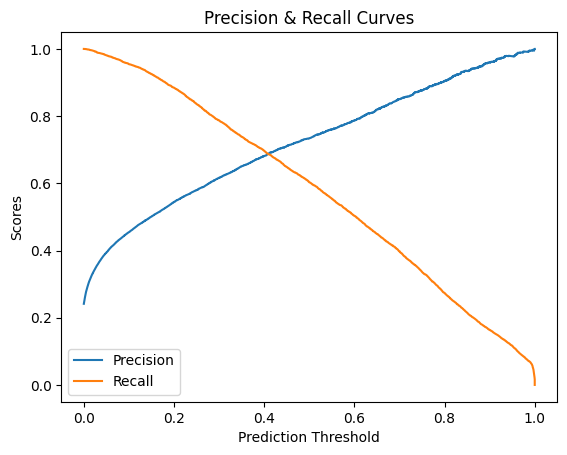

In [35]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train)[:,1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision & Recall Curves')
plt.show()

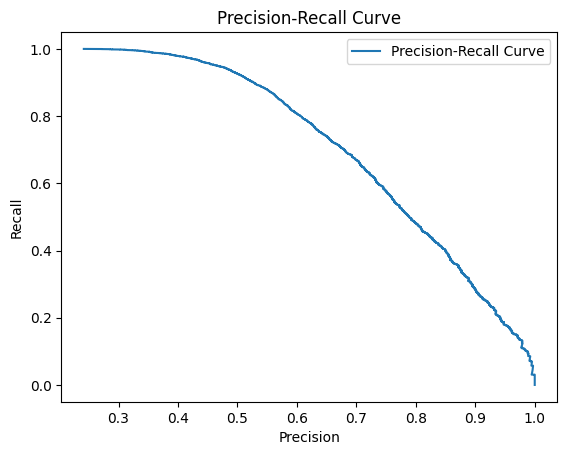

In [36]:
# Alternate View

plt.plot(p_curve[:-1],r_curve[:-1], label='Precision-Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

<Axes: >

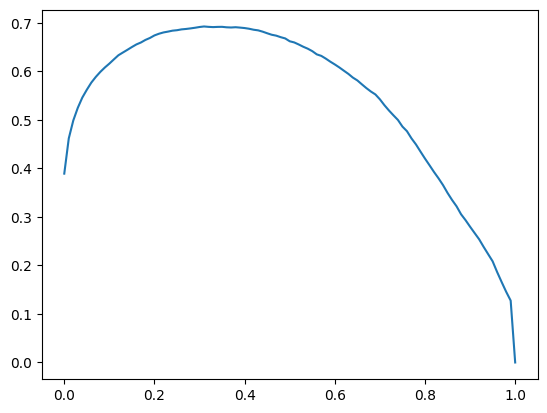

In [37]:
from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(lr.predict_proba(X_train)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=thresholds, y=f1)

In [38]:
thresh = thresholds[f1.index(max(f1))]

thresh

0.31

In [39]:
preds = lr.predict_proba(X_test)[:, 1] > thresh

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")

Accuracy: 0.8366166353971232
Precision: 0.6207605344295992
Recall: 0.7973597359735973
F1: 0.6980641433111817


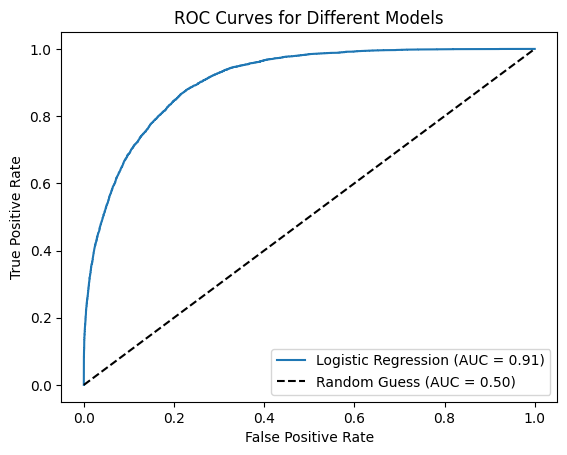

In [40]:
from sklearn.metrics import roc_curve, auc
    
# Predict probabilities for the positive class
y_probs = lr.predict_proba(X_train)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_probs)

# Calculate the AUC (Area Under the Curve)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score

# Assuming you have a trained model named 'model' and a test set named 'X_test'
y_prob = lr.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class
auc_score = roc_auc_score(y_test, y_prob)  # Calculate AUC score using true labels and probabilities

print(f"The AUC Score is: {auc_score}")

The AUC Score is: 0.9098926733484657


## Assignment 3: MultiClass Metrics

1. Calculate precision & recall by class for the fitted model below on your test data
2. Calculate overall accuracy as well as weighted averages for precision & recall on your test data.

In [42]:
import pandas as pd

credit_df = pd.read_csv("../Data/credit_train_clean.csv").drop(["Name", "SSN"], axis=1)

credit_df.head()

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [43]:
from sklearn.model_selection import train_test_split

features = [
    "Age",
    "Month",
    "Annual_Income",
    "Num_Bank_Accounts",
    "Changed_Credit_Limit",
    "Num_Credit_Card",
    "Credit_History_Age", 
    "Payment_of_Min_Amount", 
    "Monthly_Balance", 
    "Payment_Behaviour",
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Mix",
    "Total_EMI_per_month"
]

X = pd.get_dummies(credit_df[features], dtype="int", drop_first=True)
y = credit_df["Credit_Score"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [45]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.617175
0.61395


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
lr.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Average = None")
print(f"Precision: {precision_score(y_test, lr.predict(X_test), average=None)}")
print(f"Recall: {recall_score(y_test, lr.predict(X_test), average=None)}")
print(f"F1: {f1_score(y_test, lr.predict(X_test), average=None)}")
print("\nAverage = Weighted")
print(f"Precision: {precision_score(y_test, lr.predict(X_test), average='weighted')}")
print(f"Recall: {recall_score(y_test, lr.predict(X_test), average='weighted')}")
print(f"F1: {f1_score(y_test, lr.predict(X_test), average='weighted')}")

Average = None
Precision: [0.54371122 0.64256848 0.61373702]
Recall: [0.26792663 0.49217541 0.79843204]
F1: [0.35896481 0.55740578 0.69400657]

Average = Weighted
Precision: 0.6095221265363493
Recall: 0.61395
F1: 0.5940158781643746


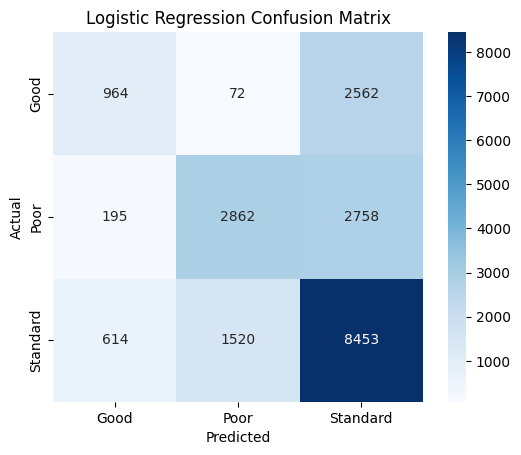

In [55]:
lr_confusion = confusion_matrix(y_test, lr.predict(X_test))
                                 
sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Good", "Poor", "Standard"],        
    yticklabels=["Good", "Poor", "Standard"]
).set(
    xlabel='Predicted',
    ylabel='Actual',
    title='Logistic Regression Confusion Matrix'
);